In [3]:
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt
import os

In [39]:
data_root_dir = 'data/train/thumbnails/'

model_file = os.path.join(data_root_dir, 'model/saved_model.tflite')
data_dir = os.path.join(data_root_dir, 'data')

In [87]:
class Predictor:
    """
    Small class used to load a tensorflow light model and predict thumbnails
    """
    
    def __init__(self, model_file):
        self.model_file = model_file
        self.interpreter = tf.lite.Interpreter(model_path=model_file)
        self.interpreter.allocate_tensors()
        
        self.input_details = interpreter.get_input_details()
        self.output_details = interpreter.get_output_details()
        
        self.target_size = self.input_details[0]['shape'][1:3]
        
    def __parse_image(self, filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, self.target_size)
        image = tf.expand_dims(image, axis=0)
        return image
        
    def predict(self, filename):
        image = self.__parse_image(filename)
        
        try:
            self.interpreter.set_tensor(input_details[0]['index'], image)
            self.interpreter.invoke()
        except RuntimeError:
            self.interpreter = tf.lite.Interpreter(model_path=self.model_file)
            self.interpreter.allocate_tensors()
            
        
        prediction = self.interpreter.get_tensor(output_details[0]['index'])
        return float(tf.nn.softmax(prediction)[0][1])
    

In [88]:
pred = Predictor(model_file)

In [102]:
# predict 10 images of each class
n = 10

images = []
for c in os.listdir(data_dir):
    for img in np.random.choice(os.listdir(os.path.join(data_dir, c)), n):
        image = plt.imread(os.path.join(data_dir, c, img))
        p = pred.predict(os.path.join(data_dir, c, img))
        images.append((p, image))

0.009022768586874008


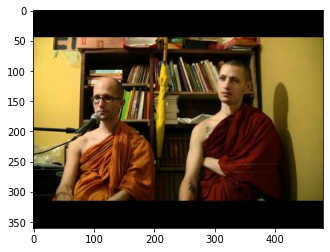

0.012276061810553074


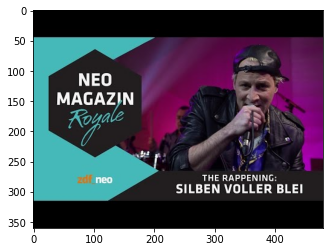

0.016179749742150307


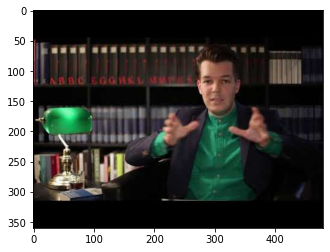

0.0811169296503067


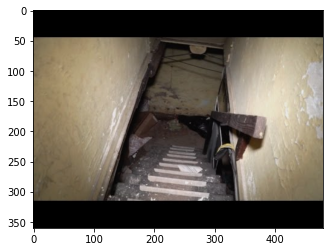

0.12341456860303879


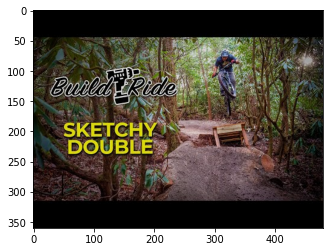

0.1338743269443512


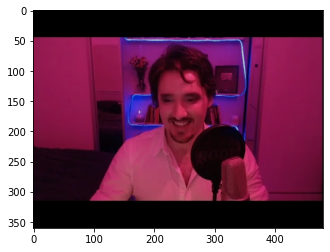

0.14125676453113556


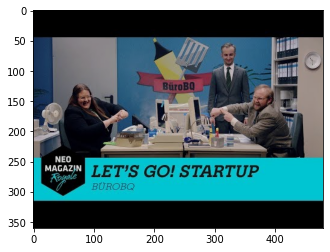

0.21825388073921204


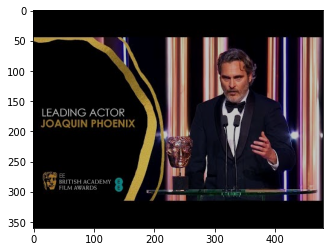

0.22360986471176147


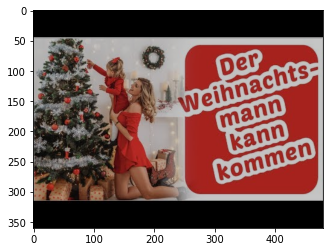

0.2636815309524536


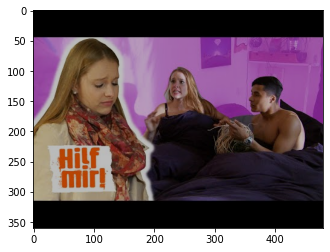

0.308084636926651


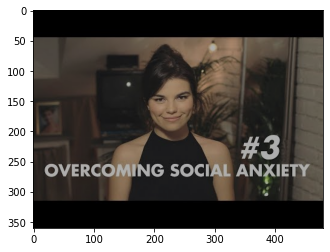

0.34220239520072937


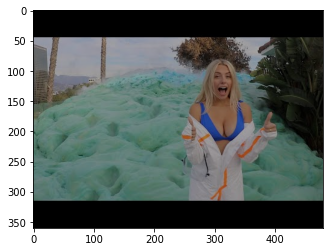

0.40771350264549255


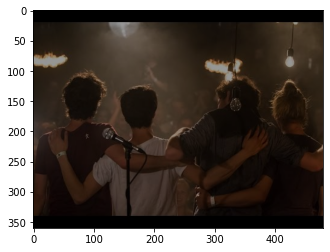

0.5542435646057129


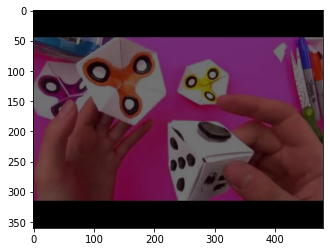

0.6647676825523376


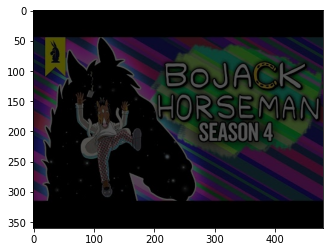

0.8022388219833374


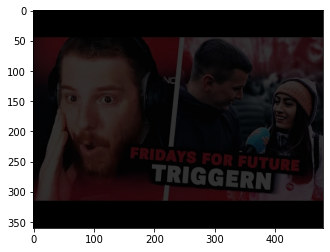

0.8924561738967896


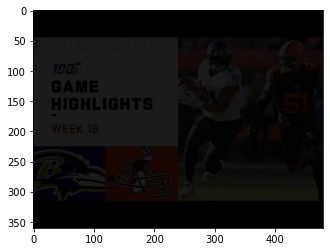

0.8982853293418884


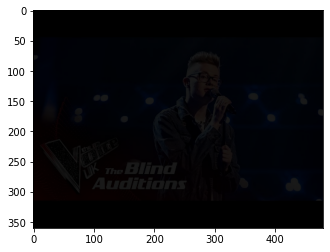

0.9065036773681641


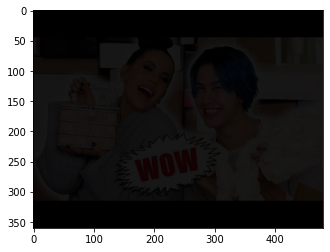

0.9728450179100037


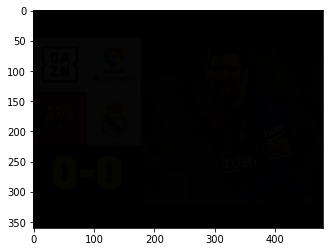

In [103]:
# show predictions and darken images based on degree if clickbaity
images = sorted(images, key=lambda x:x[0])

for p, img in images:
    print(p)
    plt.imshow(np.array(img*(1-p), dtype=int))
    plt.show()